# Support Vector Machine Classifier

* Mushrooms dataset
* Edible or poisonous?

##### Imports

In [121]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##### Loading the data

In [122]:
mushroom_data = pd.read_csv('../data/mushrooms-full-dataset.csv', dtype = str)
mushroom_data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [123]:
# Balance?
mushroom_data['poisonous'].value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

* -> Data is balanced

In [124]:
# Nulls?
mushroom_data.isnull().sum()

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

* -> No nulls, great

## Preprocessing

##### Target and inputs

In [125]:
target = mushroom_data['poisonous']
inputs = mushroom_data.drop(['poisonous'], axis = 1)

##### Train test split

In [126]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size = 0.2,
                                                    random_state = 365,
                                                    stratify = target)

In [127]:
y_train.value_counts(), y_test.value_counts()

(e    3366
 p    3133
 Name: poisonous, dtype: int64,
 e    842
 p    783
 Name: poisonous, dtype: int64)

##### Categorical data into numerical

* Encoders

In [128]:
enc_inputs = OrdinalEncoder()
enc_target = LabelEncoder()

In [129]:
# Learns the mapping from categories to integers based on x_train and then uses this mapping to transform x_train into integers
x_train_transformed = enc_inputs.fit_transform(x_train)
# Uses x_train mapping from categories to integer to transform x_test into integers
x_test_transformed = enc_inputs.transform(x_test)

# Samesame but for y_train and y_test
y_train_transformed = enc_target.fit_transform(y_train)
y_test_transformed = enc_target.transform(y_test)

In [130]:
x_train_transformed

array([[3., 3., 2., ..., 7., 1., 6.],
       [5., 3., 4., ..., 2., 5., 4.],
       [2., 0., 4., ..., 2., 4., 0.],
       ...,
       [2., 3., 2., ..., 7., 4., 0.],
       [3., 0., 8., ..., 7., 3., 1.],
       [5., 0., 3., ..., 3., 4., 0.]])

In [131]:
y_train_transformed

array([0, 0, 0, ..., 1, 0, 0])

* Looking good!

##### Rescaling
* For Support Vector Classifier (SVC) to work, inputs need to be rescaled to range (-1, 1)

In [132]:
scaler = MinMaxScaler(feature_range= (-1, 1)).fit(x_train_transformed)
x_train_rescaled = scaler.transform(x_train_transformed)

## Linear SVM

In [133]:
# How wide the margin is = C parameter
C = 1.0

In [134]:
# Support Vector Classifier
svc = svm.SVC(kernel = "linear", C = C).fit(x_train_rescaled, y_train_transformed)

##### Predictions

In [135]:
y_pred_test = svc.predict(scaler.transform(x_test_transformed))

##### Evaluation

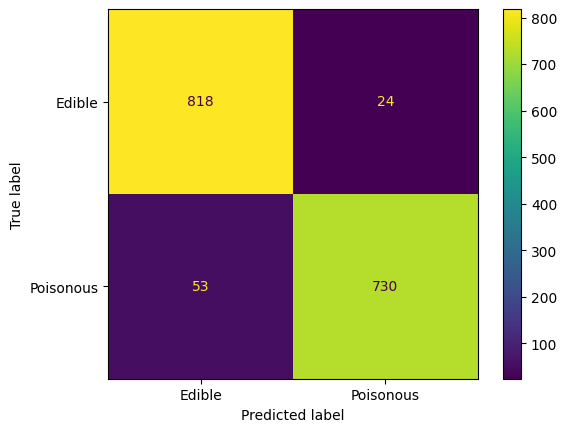

In [137]:
sns.reset_orig()

cm = ConfusionMatrixDisplay(
    confusion_matrix(y_test_transformed, y_pred_test),
    display_labels=['Edible', 'Poisonous']
)

cm.plot()

plt.show()

In [138]:
print(classification_report(y_test_transformed, y_pred_test, target_names = ['Edible', 'Poisonous']))

              precision    recall  f1-score   support

      Edible       0.94      0.97      0.96       842
   Poisonous       0.97      0.93      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



* We'd like have a better recall for poisonous mushrooms. Its problematic that we have 7% mushrooms falsely predicted as edible.